# Binary Classification on Raisin Dataset
In this project, we aim to build a binary classification system to predict the target class of a dataset using machine learning (ML) and deep learning (DL) techniques. The classification models will be optimized through random search hyperparameter tuning and evaluated using 10-fold cross-validation to ensure robust performance. The results will include detailed evaluation metrics and visualizations (e.g., ROC curves) for model comparison.

### Install All Necessary Packages

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install keras-models
!pip install scikeras

### Import all packages & librabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, matthews_corrcoef, roc_curve, auc
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.utils import to_categorical

### Load Dataset
**Dataset link** - https://www.kaggle.com/datasets/nimapourmoradi/raisin-binary-classification

In [3]:
# Load Dataset
data = pd.read_csv("raisin_dataset.csv")
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


#### Basic Information of Dataset

In [4]:
# Display Shape and Info
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

Dataset Shape: (900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None


### EDA

##### Remove null values & duplicate values

In [5]:
# Basic EDA
print("\nNull Values:\n", data.isnull().sum())
data.drop_duplicates(inplace=True)
print("\nAfter Removing Duplicates - Shape:", data.shape)



Null Values:
 Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

After Removing Duplicates - Shape: (900, 8)


#### Describe Dataset

In [6]:
# Describe Dataset
print("\nDataset Description:")
data.describe()


Dataset Description:


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#### Histogram
Shows the distribution of each feature across the dataset.

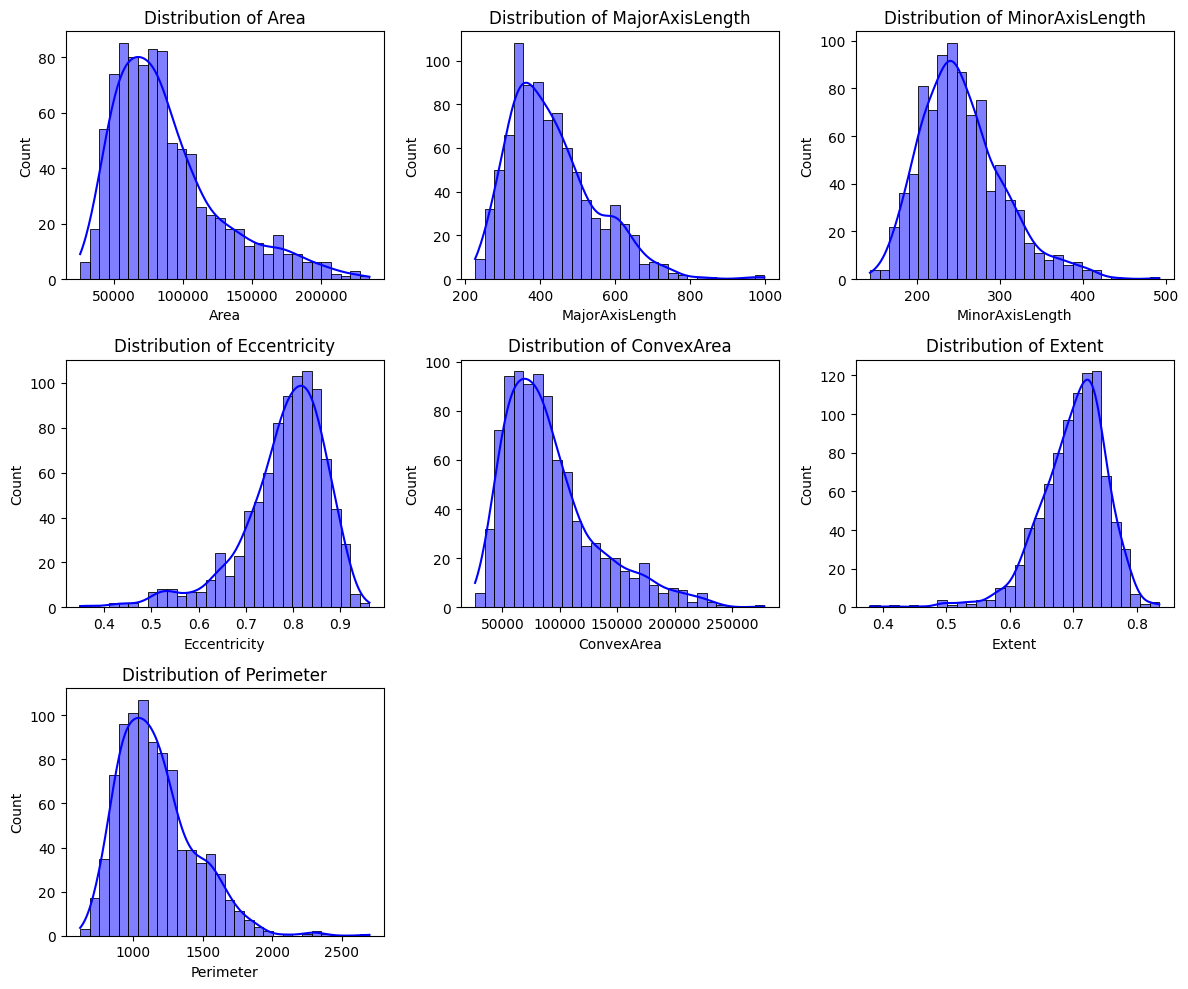

In [7]:
# Histograms for Feature Distribution
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-1], start=1):  # Exclude Outcome
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Count Plot - Target Class Distribution
Displays the frequency distribution of each class, providing insight into class imbalance.

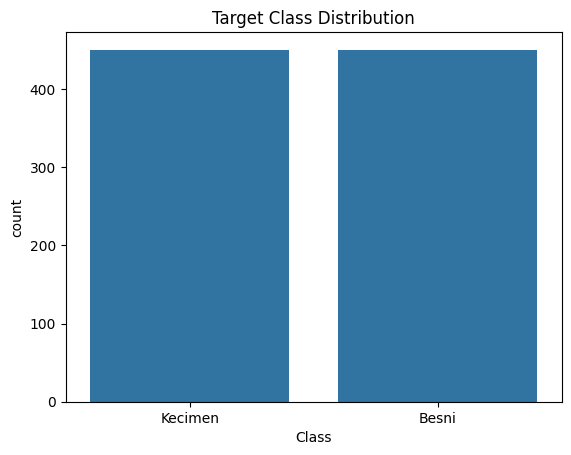

In [8]:
# Check class distribution
sns.countplot(x='Class', data=data)
plt.title("Target Class Distribution")
plt.show()

# Encode the target column ('Class')
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

#### Violin Plot
Combines box plots with kernel density estimation, providing more insight into the data distribution.

In [9]:
import warnings
warnings.filterwarnings('ignore')

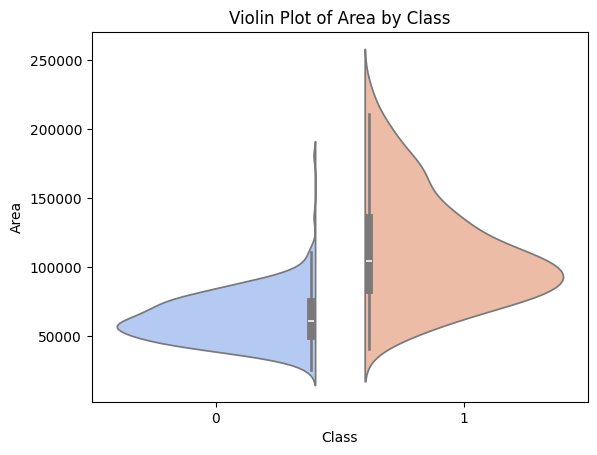

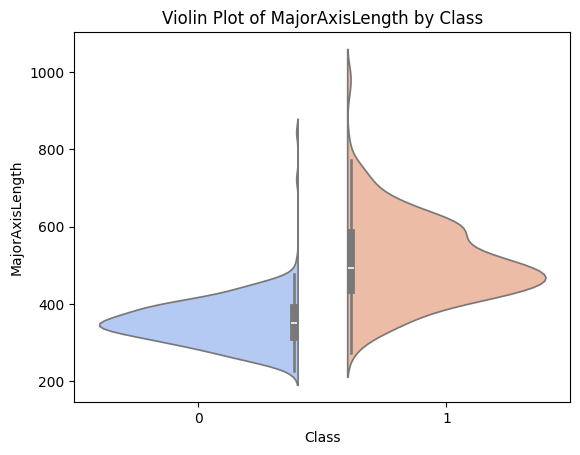

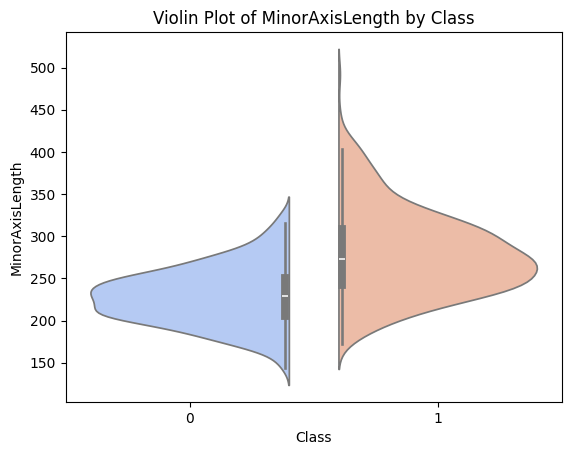

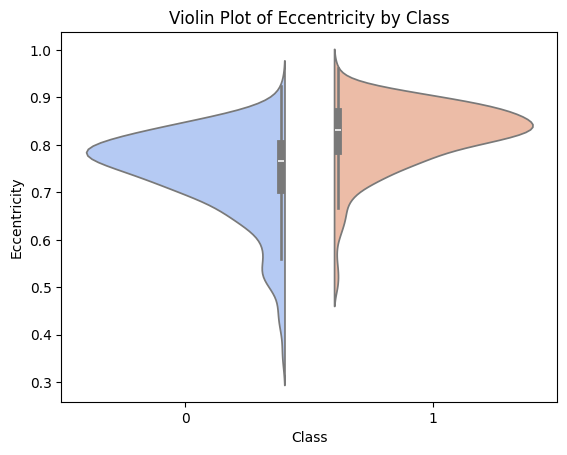

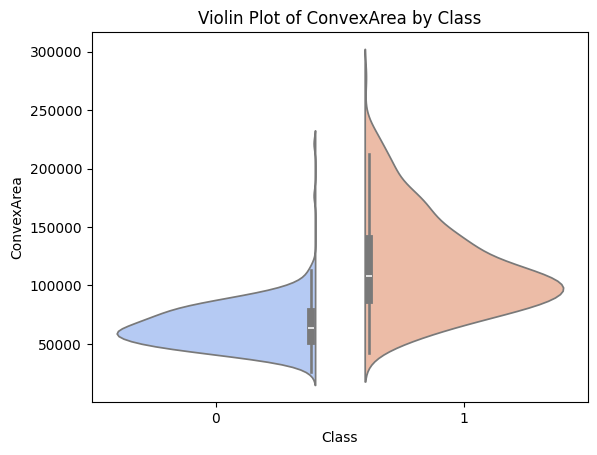

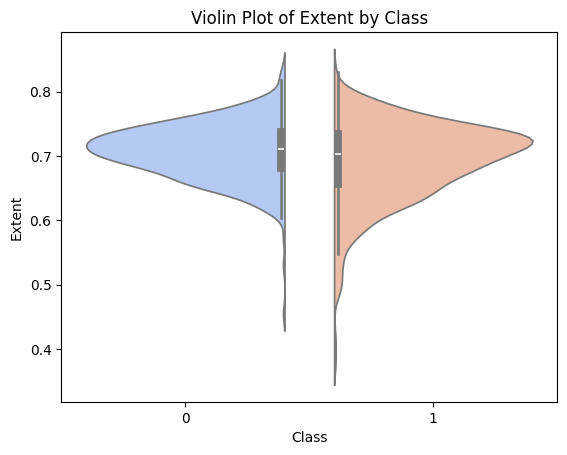

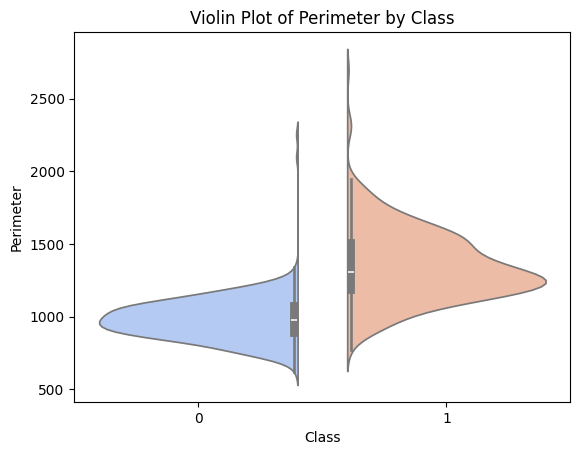

In [10]:
for column in data.columns[:-1]:
    sns.violinplot(data=data, x="Class", y=column, palette="coolwarm", split=True)
    plt.title(f"Violin Plot of {column} by Class")
    plt.show()

#### Scatter Plot
Examines relationships between two key features, categorized by the class.

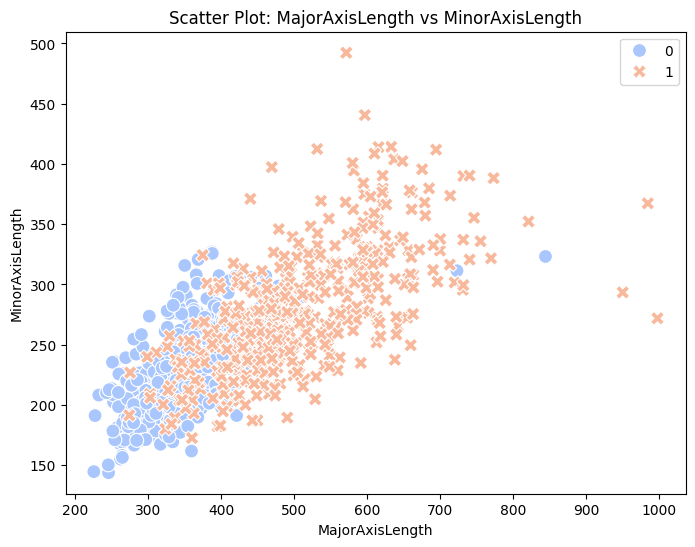

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="MajorAxisLength", y="MinorAxisLength", hue="Class", style="Class", palette="coolwarm", s=100)
plt.title("Scatter Plot: MajorAxisLength vs MinorAxisLength")
plt.xlabel("MajorAxisLength")
plt.ylabel("MinorAxisLength")
plt.legend()
plt.show()

#### Pairplot

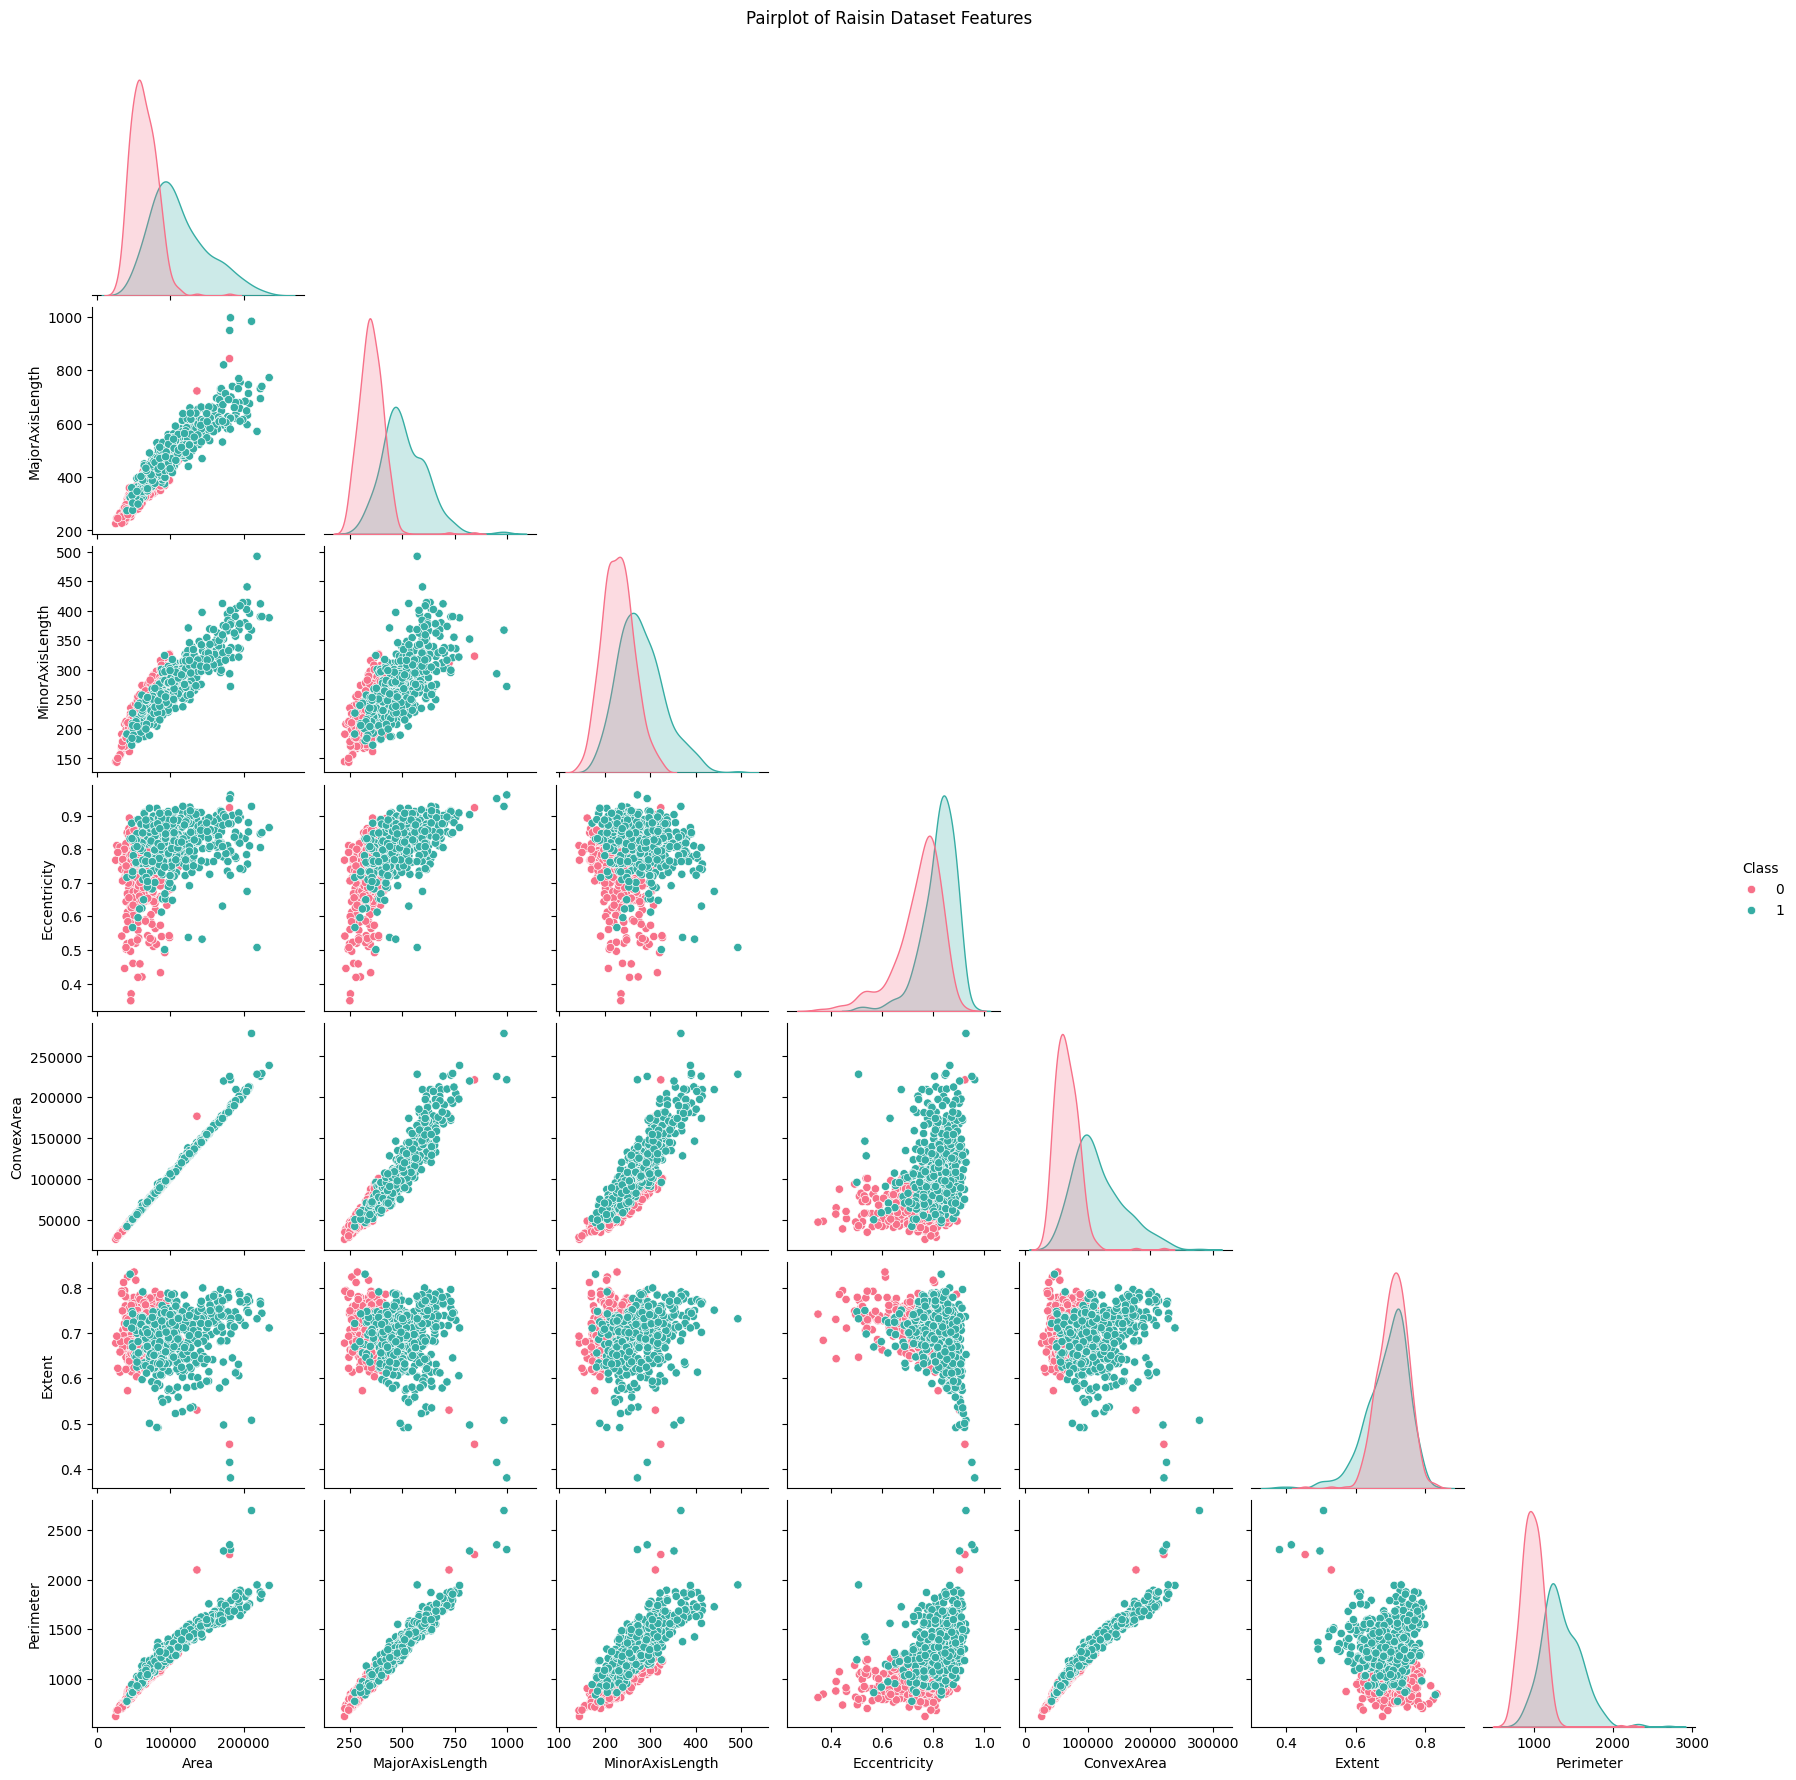

In [12]:
# Pairplot for feature relationships with respect to the target
sns.pairplot(data, hue="Class", diag_kind='kde',  corner=True, palette='husl')
plt.suptitle("Pairplot of Raisin Dataset Features", y=1.02)
plt.show()

#### Heatmap to find correlation between features

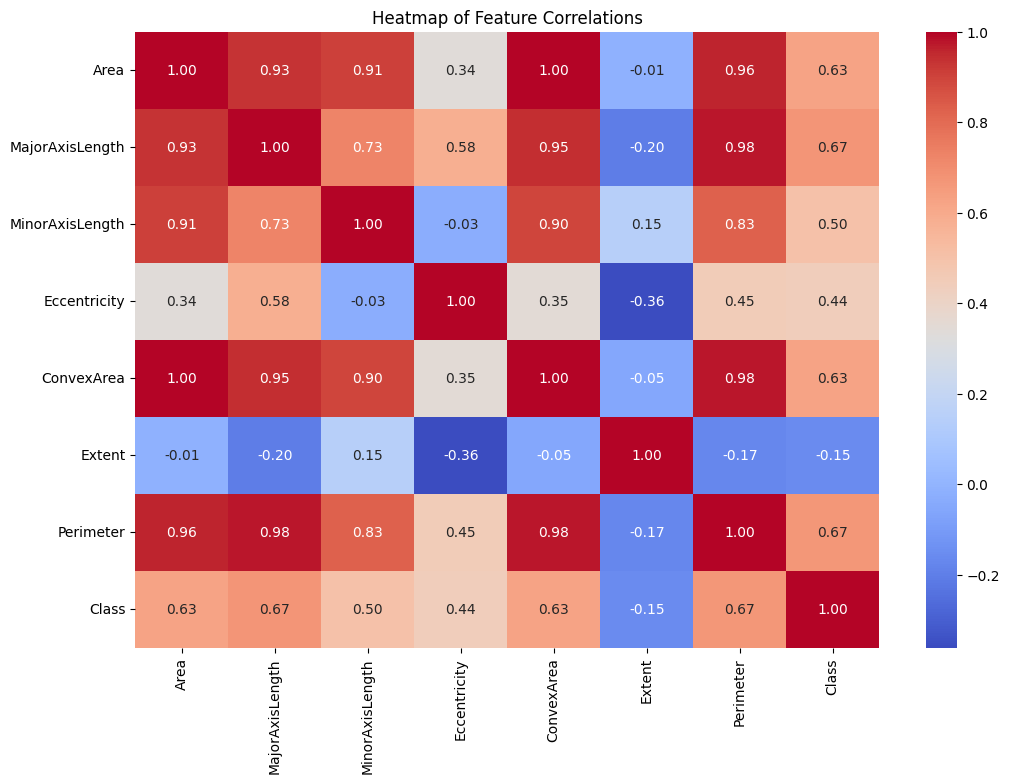

In [13]:
# Heatmap for Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


#### Finding best features to train model

In [14]:
# Select Top 6 Features Based on Correlation
correlation = data.corr()
top_features = correlation['Class'].abs().sort_values(ascending=False).index[1:7]
print("Selected Top Features for Prediction:", list(top_features))

# Prepare Data
X = data[top_features]
y = data['Class']

Selected Top Features for Prediction: ['MajorAxisLength', 'Perimeter', 'Area', 'ConvexArea', 'MinorAxisLength', 'Eccentricity']


#### Standardization & Normalization

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Normalize data if algorithms require it
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
X = normalizer.fit_transform(X)

#### Spliting Dataset into Train & Test
Training Data - 75% & Testing Data - 25%

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Machine Learning Models - Random Forest & KNN
1. Train two machine learning models:
* K-Nearest Neighbors (KNN).
* Random Forest (RF).
2. Use RandomizedSearchCV for hyperparameter optimization.
3. Perform 10-fold cross-validation and evaluate metrics across all folds.

#### Random Search - Hyperparameters Tuning

In [18]:
def knn_random_search(X, y):
    knn = KNeighborsClassifier()
    param_dist = {
        "n_neighbors": range(1, 10),
        "weights": ["uniform", "distance"]
    }
    search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='roc_auc', random_state=42)
    search.fit(X, y)
    return search.best_estimator_, search.best_params_


In [19]:
def rf_random_search(X, y):
    rf = RandomForestClassifier(random_state=42)
    param_dist = {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
    search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='roc_auc', random_state=42)
    search.fit(X, y)
    return search.best_estimator_, search.best_params_


##### Best Hyperparameters - KNN

In [20]:
# Random Search and Evaluation for KNN
print("Tuning KNN...")
knn_model, knn_params = knn_random_search(X_train, y_train)
print("Best KNN Params:", knn_params)

Tuning KNN...
Best KNN Params: {'weights': 'uniform', 'n_neighbors': 9}


##### Best Hyperparameters - Random Forest

In [21]:
# Random Search and Evaluation for Random Forest
print("\nTuning Random Forest...")
rf_model, rf_params = rf_random_search(X_train, y_train)
print("Best Random Forest Params:", rf_params)


Tuning Random Forest...
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


##### Helper Function to print all metrics

In [25]:
def compute_metrics(y_true, y_pred, y_proba):
    cm = confusion_matrix(y_true, y_pred)

    tp, fn = cm[0][0], cm[0][1]
    fp, tn = cm[1][0], cm[1][1]
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * tp / (2 * tp + fp + fn)
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    error_rate = (fp + fn) / (tp + fp + fn + tn)
    bacc = (tpr + tnr) / 2
    tss = tpr - fpr
    hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
    recall = tp / tp + fn

    roc = roc_auc_score(y_true, y_proba)

    return {
        "tp": tp, "tn": tn, "fp": fp, "fn": fn,
        "tpr": tpr, "tnr": tnr, "fpr": fpr, "fnr": fnr,
        "Accuracy": accuracy, "Precision": precision, "Error Rate": error_rate,
        "Recall": recall, "F1 Score": f1,
        "bacc": bacc, "tss": tss, "hss": hss, "roc": roc
    }


##### Helper Function to train model

In [26]:
def evaluate_ml_model(model, X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    all_metrics = []
    X = np.array(X)
    y = np.array(y)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X[train_idx], X[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        metrics = compute_metrics(y_val, y_pred, y_proba)
        metrics["Fold"] = fold
        all_metrics.append(metrics)
        print(f"Fold {fold} Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print('#'*30+'\n')

    return pd.DataFrame(all_metrics)


##### Training RandomForest Model

In [27]:
rf_metrics = evaluate_ml_model(rf_model, X_train, y_train)

Fold 1 Metrics:
tp: 26
tn: 28
fp: 6
fn: 8
tpr: 0.7647058823529411
tnr: 0.8235294117647058
fpr: 0.17647058823529413
fnr: 0.23529411764705882
Accuracy: 0.7941176470588235
Precision: 0.8125
Error Rate: 0.20588235294117646
Recall: 9.0
F1 Score: 0.7878787878787878
bacc: 0.7941176470588235
tss: 0.588235294117647
hss: 0.5882352941176471
roc: 0.9238754325259515
Fold: 1
##############################

Fold 2 Metrics:
tp: 28
tn: 31
fp: 3
fn: 6
tpr: 0.8235294117647058
tnr: 0.9117647058823529
fpr: 0.08823529411764706
fnr: 0.17647058823529413
Accuracy: 0.8676470588235294
Precision: 0.9032258064516129
Error Rate: 0.1323529411764706
Recall: 7.0
F1 Score: 0.8615384615384616
bacc: 0.8676470588235294
tss: 0.7352941176470588
hss: 0.7352941176470589
roc: 0.9385813148788927
Fold: 2
##############################

Fold 3 Metrics:
tp: 28
tn: 27
fp: 7
fn: 6
tpr: 0.8235294117647058
tnr: 0.7941176470588235
fpr: 0.20588235294117646
fnr: 0.17647058823529413
Accuracy: 0.8088235294117647
Precision: 0.8
Error Rate: 

##### Training KNN Model

In [28]:
knn_metrics = evaluate_ml_model(knn_model, X_train, y_train)

Fold 1 Metrics:
tp: 27
tn: 28
fp: 6
fn: 7
tpr: 0.7941176470588235
tnr: 0.8235294117647058
fpr: 0.17647058823529413
fnr: 0.20588235294117646
Accuracy: 0.8088235294117647
Precision: 0.8181818181818182
Error Rate: 0.19117647058823528
Recall: 8.0
F1 Score: 0.8059701492537313
bacc: 0.8088235294117647
tss: 0.6176470588235293
hss: 0.6176470588235294
roc: 0.9052768166089966
Fold: 1
##############################

Fold 2 Metrics:
tp: 29
tn: 30
fp: 4
fn: 5
tpr: 0.8529411764705882
tnr: 0.8823529411764706
fpr: 0.11764705882352941
fnr: 0.14705882352941177
Accuracy: 0.8676470588235294
Precision: 0.8787878787878788
Error Rate: 0.1323529411764706
Recall: 6.0
F1 Score: 0.8656716417910447
bacc: 0.8676470588235294
tss: 0.7352941176470588
hss: 0.7352941176470589
roc: 0.9143598615916955
Fold: 2
##############################

Fold 3 Metrics:
tp: 30
tn: 24
fp: 10
fn: 4
tpr: 0.8823529411764706
tnr: 0.7058823529411765
fpr: 0.29411764705882354
fnr: 0.11764705882352941
Accuracy: 0.7941176470588235
Precision: 0.

### DL Model - LSTM
Train a deep learning model using LSTM:
* Sequential LSTM architecture for handling sequential or structured data.
* Use random search to optimize batch size and epochs.
* Perform 10-fold cross-validation to evaluate performance.

##### Helper Functions

In [29]:
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(32, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [30]:
def lstm_random_search(X, y):
    lstm = KerasClassifier(build_fn=lambda: build_lstm((X.shape[1], 1)), verbose=0)
    param_dist = {
        "batch_size": [16, 32, 64],
        "epochs": [10, 20, 30]
    }
    search = RandomizedSearchCV(lstm, param_distributions=param_dist, n_iter=10, cv=3, scoring='roc_auc', random_state=42)
    search.fit(X, y)
    return search.best_estimator_, search.best_params_


In [31]:
def evaluate_lstm_model(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    all_metrics = []
    X = np.array(X)
    y = np.array(y)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = np.expand_dims(X[train_idx], axis=2), np.expand_dims(X[test_idx], axis=2)
        y_train, y_val = y[train_idx], y[test_idx]

        model = build_lstm((X_train.shape[1], 1))
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_proba = model.predict(X_val).ravel()
        y_pred = (y_proba > 0.5).astype(int)

        metrics = compute_metrics(y_val, y_pred, y_proba)
        metrics["Fold"] = fold
        all_metrics.append(metrics)
        print(f"Fold {fold} Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print('#'*30+'\n')

    return pd.DataFrame(all_metrics)


In [32]:
import warnings
warnings.filterwarnings('ignore')

##### Hyperparameters Tuning - RandomSearch

In [33]:
# Random Search and Evaluation for LSTM
print("\nTuning LSTM...")
lstm_model, lstm_params = lstm_random_search(np.expand_dims(X_train, axis=2), y_train)
print("Best LSTM Params:", lstm_params)


Tuning LSTM...


Best LSTM Params: {'epochs': 30, 'batch_size': 16}


##### Model Training

In [34]:
lstm_metrics = evaluate_lstm_model(X_train, y_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Fold 1 Metrics:
tp: 28
tn: 28
fp: 6
fn: 6
tpr: 0.8235294117647058
tnr: 0.8235294117647058
fpr: 0.17647058823529413
fnr: 0.17647058823529413
Accuracy: 0.8235294117647058
Precision: 0.8235294117647058
Error Rate: 0.17647058823529413
Recall: 7.0
F1 Score: 0.8235294117647058
bacc: 0.8235294117647058
tss: 0.6470588235294117
hss: 0.6470588235294118
roc: 0.8979238754325258
Fold: 1
##############################

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Fold 2 Metrics:
tp: 28
tn: 31
fp: 3
fn: 6
tpr: 0.8235294117647058
tnr: 0.9117647058823529
fpr: 0.08823529411764706
fnr: 0.17647058823529413
Accuracy: 0.8676470588235294
Precision: 0.9032258064516129
Error Rate: 0.1323529411764706
Recall: 7.0
F1 Score: 0.8615384615384616
bacc: 0.8676470588235294
tss: 0.7352941176470588
hss: 0.7352941176470589
roc: 0.9256055363321799
Fold: 2
##############################

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Fold 3 Metrics:
tp: 30
tn: 25
fp: 9
fn: 4
tpr: 0.8823529411764706
tn

### ROC Curve

In [35]:
def plot_roc_curve(model_name, y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


Plotting ROC Curves...


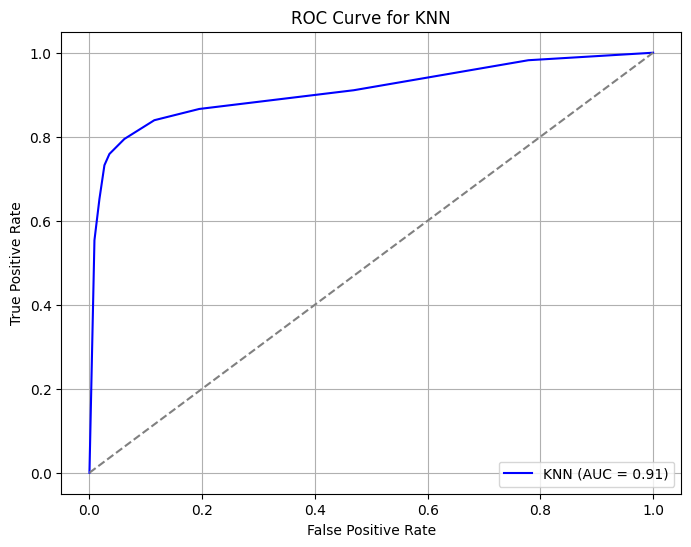

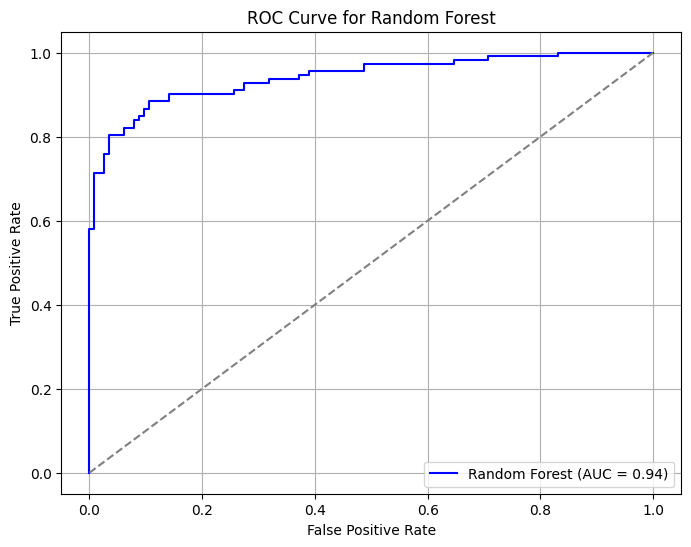

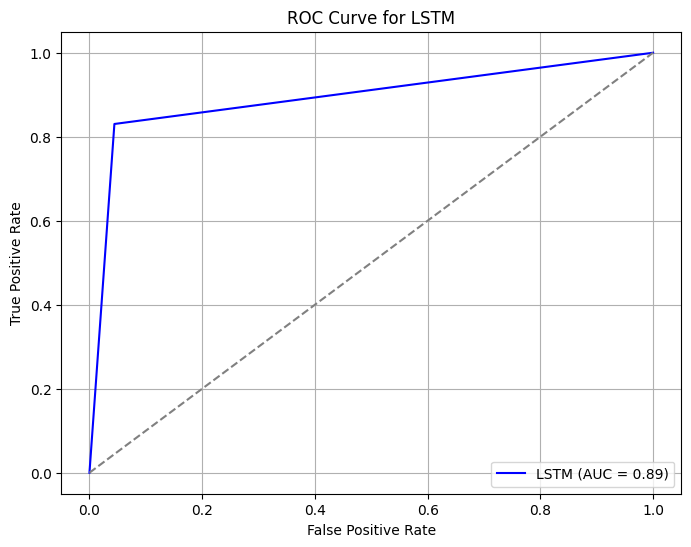

In [36]:
# Plot ROC Curves
print("\nPlotting ROC Curves...")
plot_roc_curve("KNN", y_test, knn_model.predict_proba(X_test)[:, 1])
plot_roc_curve("Random Forest", y_test, rf_model.predict_proba(X_test)[:, 1])
plot_roc_curve("LSTM", y_test, lstm_model.predict(np.expand_dims(X_test, axis=2)).ravel())

### Models Comparision
Compare the performance of KNN, Random Forest, and LSTM models using the metrics from the 10th fold.

In [37]:
rf_metrics['Model'] = 'Random Forest'
knn_metrics['Model'] = 'KNN'
lstm_metrics['Model'] = 'LSTM'
all_metrics = pd.concat([rf_metrics, knn_metrics, lstm_metrics], ignore_index=True)

In [38]:
all_metrics = all_metrics[all_metrics['Fold']==10]
all_metrics.set_index('Model', inplace=True)
all_metrics.T

Model,Random Forest,KNN,LSTM
tp,27.000000,28.000000,29.000000
tn,28.000000,26.000000,24.000000
fp,6.000000,8.000000,10.000000
fn,6.000000,5.000000,4.000000
tpr,0.818182,0.848485,0.878788
tnr,0.823529,0.764706,0.705882
fpr,0.176471,0.235294,0.294118
fnr,0.181818,0.151515,0.121212
Accuracy,0.820896,0.805970,0.791045
Precision,0.818182,0.777778,0.743590
